In [1]:
# Loading R packages
library(reshape)
library(ggplot2)
library(phyloseq)
library(dplyr)
library(wesanderson)
library(vegan)
library(ggrepel)


Attaching package: ‘dplyr’

The following object is masked from ‘package:reshape’:

    rename

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: permute
Loading required package: lattice
This is vegan 2.5-6


In [5]:
# Importing individual sample datasets
ps.wu = readRDS(file = "wu.ps")
ps.imparato = readRDS(file = "imparato.ps")
ps.yao = readRDS(file = "yao.ps")
ps.dai2016 = readRDS(file = "dai2016.ps")
ps.dai2017 = readRDS(file = "dai2017.ps")
ps.song = readRDS(file = "song.ps")
ps.whitman = readRDS(file = "whitman.ps")

In [2]:
ps.glom.genus = readRDS(file = "ps.glom.genus.ps")
#cutoff=1000
#ps.glom.genus = prune_samples(sample_sums(ps.glom.genus)>cutoff, ps.glom.genus)
#ps.glom.genus = rarefy_even_depth(ps.glom.genus)
ps.norm = transform_sample_counts(ps.glom.genus, function(x) x/sum(x)) 
ps.norm = subset_samples(ps.norm, PyOM != "OM")
ps.norm = prune_taxa(taxa_sums(ps.norm)>0, ps.norm)
ps.norm = subset_samples(ps.norm,Incubation_Time_Weeks != 0)
ps.norm = subset_samples(ps.norm,!(Incubation_Time_Weeks ==24 & Author == "Song"))
# Song doesn't have a control sample at 24 weeks

In [9]:
# Two options for ordinations
ord_full_pcoa = ordinate(ps.norm, method = "PCoA", distance = "bray")
ord_full_nmds = ordinate(ps.norm, method = "NMDS", distance = "bray", trymax=1000)

Run 0 stress 0.171786 
Run 1 stress 0.1654043 
... New best solution
... Procrustes: rmse 0.02233905  max resid 0.1082196 
Run 2 stress 0.1697748 
Run 3 stress 0.1537952 
... New best solution
... Procrustes: rmse 0.009561556  max resid 0.1122819 
Run 4 stress 0.1796942 
Run 5 stress 0.1863185 
Run 6 stress 0.1666977 
Run 7 stress 0.1622922 
Run 8 stress 0.1821927 
Run 9 stress 0.1838786 
Run 10 stress 0.1606697 
Run 11 stress 0.160543 
Run 12 stress 0.1540801 
... Procrustes: rmse 0.004548159  max resid 0.06800947 
Run 13 stress 0.153647 
... New best solution
... Procrustes: rmse 0.001104893  max resid 0.01178368 
Run 14 stress 0.1850014 
Run 15 stress 0.1802249 
Run 16 stress 0.160676 
Run 17 stress 0.154117 
... Procrustes: rmse 0.005538075  max resid 0.06389194 
Run 18 stress 0.2157576 
Run 19 stress 0.160505 
Run 20 stress 0.207281 
Run 21 stress 0.1915754 
Run 22 stress 0.1536462 
... New best solution
... Procrustes: rmse 0.0001935737  max resid 0.002408598 
... Similar to prev

In [10]:
ord_full_nmds


Call:
metaMDS(comm = veganifyOTU(physeq), distance = distance, trymax = 1000) 

global Multidimensional Scaling using monoMDS

Data:     veganifyOTU(physeq) 
Distance: bray 

Dimensions: 2 
Stress:     0.1536462 
Stress type 1, weak ties
Two convergent solutions found after 22 tries
Scaling: centring, PC rotation, halfchange scaling 
Species: expanded scores based on ‘veganifyOTU(physeq)’ 


In [11]:
# Formatting the sample data for convenience of plotting

df = data.frame(sample_data(ps.norm))

df = df %>%
    mutate(SoilXLabel = paste(SoilType,Incubation_Time_Weeks,PyOM,Feedstock,t.per.ha.PyOM,g.per.kg.PyOM,PyOM.Temp))%>%
    mutate(CharType = paste(PyOM,Feedstock,t.per.ha.PyOM,g.per.kg.PyOM,PyOM.Temp,Incubation_Time_Weeks))%>%
    mutate(Time_Category = ifelse(PyOM=="Control", "Control",
                                 ifelse(as.numeric(Incubation_Time_Weeks)<100, "PyOM Short","PyOM Long")))%>%
    mutate(Time_Facet = ifelse(Incubation_Time_Weeks == 0, "Initial",
                                 ifelse(as.numeric(Incubation_Time_Weeks)<100, "PyOM Short","PyOM Long")))%>%
    mutate(Temp_Category = ifelse(PyOM=="Control", "Control",paste(PyOM,PyOM.Temp)))%>%
    mutate(SoilTypeName = paste(SoilType," (",Author,")",sep=""), SoilType)
df = sample_data(df)
row.names(df) = row.names(sample_data(ps.norm))

sample_data(ps.norm) = df

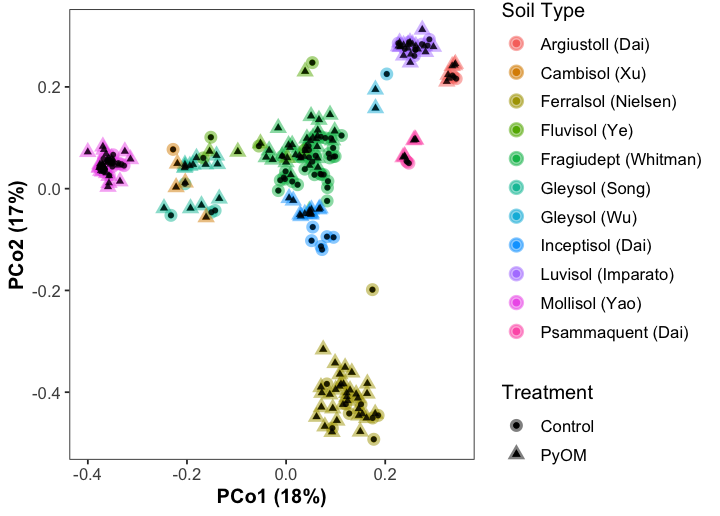

In [14]:
options(repr.plot.width=6, repr.plot.height=4.3)

p = plot_ordination(ps.norm, ord_full_pcoa, axes=c(1,2), color="SoilTypeName", shape="PyOM")

p = p + geom_point(size=3, stroke=1, alpha=0.5)
p = p + geom_point(size=1, stroke=1, alpha=0.8, color="black") #+ scale_shape_manual(values=c(21,23))

p = p + theme_bw() + theme(legend.position="right") +
  theme(
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    ,axis.title = element_text(size=12, face="bold"),
        axis.text = element_text(size=10),
        legend.text = element_text(size=10),
        legend.title = element_text(size = 12),
        strip.background = element_rect(colour="white", fill="white")) #+ facet_wrap(~SoilType, scales="free")
p = p + guides(shape=guide_legend(title="Treatment"),color=guide_legend(title="Soil Type"))
p = p + ylab("PCo2 (17%)")
p = p + xlab("PCo1 (18%)")
p

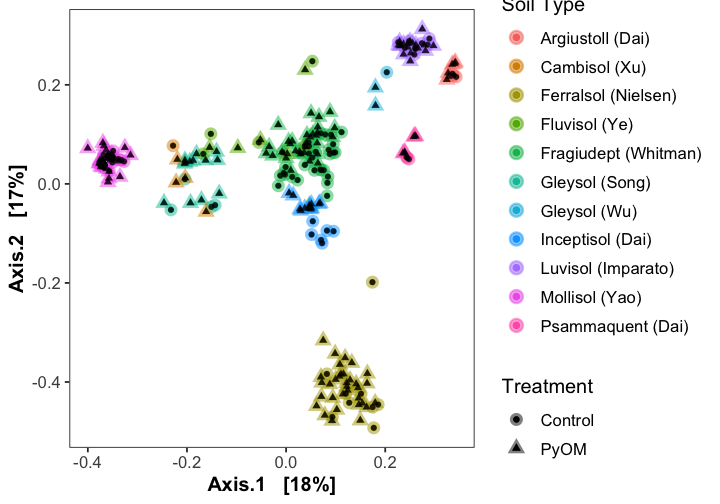

In [7]:
options(repr.plot.width=6, repr.plot.height=4.2)

p = plot_ordination(ps.norm, ord_full_pcoa, axes=c(1,2), color="SoilTypeName", shape="PyOM")

p = p + geom_point(size=3, stroke=1, alpha=0.5)
p = p + geom_point(size=1, stroke=1, alpha=0.8, color="black") #+ scale_shape_manual(values=c(21,23))

p = p + theme_bw() + theme(legend.position="right") +
  theme(
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    ,axis.title = element_text(size=12, face="bold"),
        axis.text = element_text(size=10),
        legend.text = element_text(size=10),
        legend.title = element_text(size = 12),
        strip.background = element_rect(colour="white", fill="white")) #+ facet_wrap(~SoilType, scales="free")
p = p + guides(shape=guide_legend(title="Treatment"),color=guide_legend(title="Soil Type"))
#p = p + ylab("PCo2 (17.5%)")
#p = p + xlab("PCo1 (18.3%)")
p

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Groups,1,0.05108388,0.05108388,2.234908,0.136196
Residuals,248,5.66860061,0.02285726,NA,NA


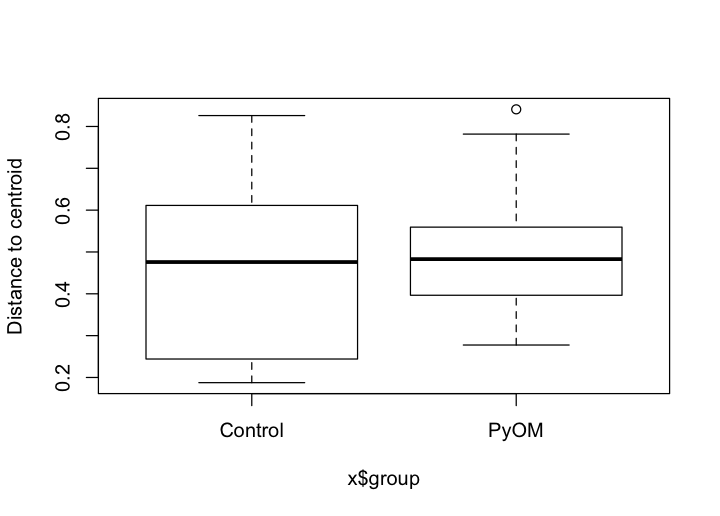

In [15]:
d = distance(ps.norm, method = "bray")
samdat = sample_data(ps.norm)
groups = as.factor(samdat$PyOM)
x = betadisper(d, groups)
boxplot(x, ylab = "Distance to centroid")
anova(x)
# Different samples do not have different dispersions; thus we can interpret the results of the adonis.

In [16]:
metadata = as(sample_data(ps.norm), "data.frame")
adonis(distance(ps.norm, method="bray") ~ SoilTypeName * PyOM, data = metadata)

# All factors are significant, including the interaction
# I.e., soiltype / studies have different communities
# PyOM affects the communities
# And PyOM affects different communities different ways


Call:
adonis(formula = distance(ps.norm, method = "bray") ~ SoilTypeName *      PyOM, data = metadata) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                   Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
SoilTypeName       10    51.091  5.1091 113.851 0.81255  0.001 ***
PyOM                1     0.184  0.1838   4.096 0.00292  0.001 ***
SoilTypeName:PyOM  10     1.371  0.1371   3.055 0.02180  0.001 ***
Residuals         228    10.232  0.0449         0.16272           
Total             249    62.877                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### Trying distance-based partial redundancy analysis

Call: capscale(formula = taxa ~ samdat$PyOM +
Condition(samdat$SoilTypeName), distance = "bray")

                Inertia Proportion Rank
Total         62.877081   1.000000     
Conditional   51.101351   0.812718   10
Constrained    0.194380   0.003091    1
Unconstrained 14.108227   0.224378  146
Imaginary     -2.526878  -0.040188  103
Inertia is squared Bray distance 
Species scores projected from ‘taxa’ 

Eigenvalues for constrained axes:
   CAP1 
0.19438 

Eigenvalues for unconstrained axes:
  MDS1   MDS2   MDS3   MDS4   MDS5   MDS6   MDS7   MDS8 
1.0895 0.8325 0.7254 0.6717 0.5738 0.5298 0.4757 0.4376 
(Showing 8 of 146 unconstrained eigenvalues)


,Df,SumOfSqs,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
samdat$PyOM,1,0.1943803,3.279116,0.001
Residual,238,14.1082268,NA,NA


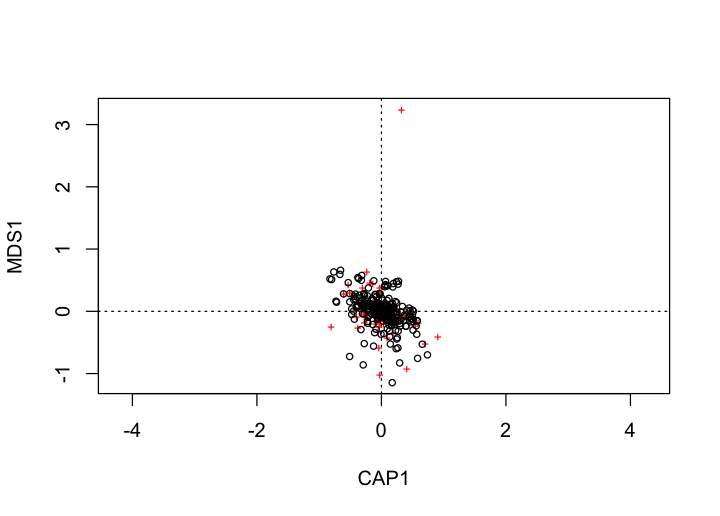

In [17]:
# capscale (vegan):
# Distance-based redundancy analysis (dbRDA) is an ordination method similar to Redundancy Analysis (rda), 
# but it allows non-Euclidean dissimilarity indices, such as Manhattan or Bray–Curtis distance. 

# Get sample data and OTU table
samdat = sample_data(ps.norm)
taxa = t(otu_table(ps.norm))

# Run partial distance-based redundancy analysis
# where we control for (condition on) soil type
# and test for (constrain by) PyOM addition status
pdbRDA = capscale(taxa ~ samdat$PyOM + Condition(samdat$SoilTypeName), dist="bray")
pdbRDA

# Look at effect of PyOM
anova(pdbRDA, by="term")

# Plot data for samples (sites) and taxa (species)
plot(pdbRDA,choices=c("CAP1","MDS1"),display = c("sites","species"),scaling=3)

In [18]:
# Save the scores for each sample (choosing the constrained on (PyOM) and the first three others)
SiteScores = data.frame(scores(pdbRDA,choices=c("CAP1","MDS1","MDS2","MDS3"),display = c("sites"),scaling=3))
SiteScores$SampleID = row.names(SiteScores)
head(SiteScores)

,CAP1,MDS1,MDS2,MDS3,SampleID
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
S101,-0.322378436,0.16268060,0.235151070,0.1338876,S101
S102,-0.007299907,-0.02163584,0.007148913,0.3201244,S102
S103,-0.108771008,-0.34290148,-0.135192956,0.1330758,S103
S104,0.581194445,-0.75567041,-0.224369448,-0.4426676,S104
S106,0.142640388,-0.52642353,-0.240001845,-0.2924381,S106
S107,-0.059777656,-0.11768674,0.120481071,0.2060232,S107


In [19]:
# Collect the sample data and pull out just the variables of interest
samdat=sample_data(ps.norm)
samdat$SampleID = row.names(samdat)
samdat = samdat %>% select(PyOM,SampleID,SoilTypeName)
head(samdat)

,PyOM,SampleID,SoilTypeName
,<chr>,<chr>,<chr>
S101,Control,S101,Fragiudept (Whitman)
S102,PyOM,S102,Fragiudept (Whitman)
S103,Control,S103,Fragiudept (Whitman)
S104,PyOM,S104,Fragiudept (Whitman)
S106,Control,S106,Fragiudept (Whitman)
S107,PyOM,S107,Fragiudept (Whitman)


In [20]:
# Join the partial dbRDA scores with the sample properties for plotting
PlotDataSites = data.frame(SiteScores,samdat)

Warning message:
“Removed 8 rows containing missing values (geom_point).”

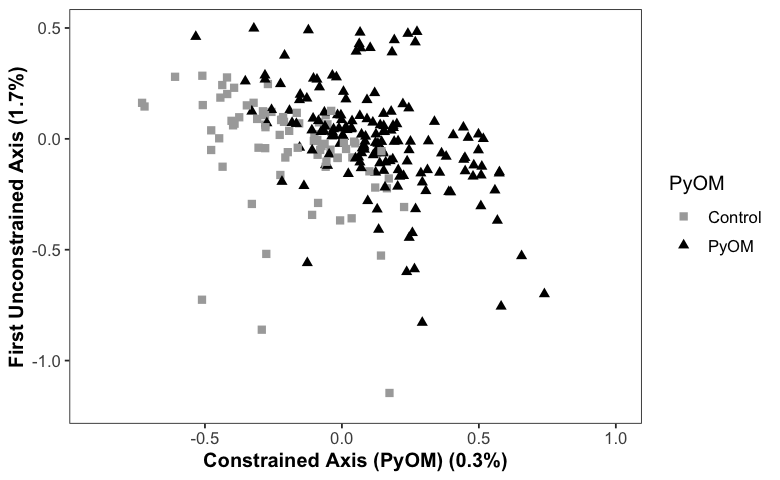

In [44]:
options(repr.plot.width=6.5, repr.plot.height=4)
# Plot the partial dbRDA, coloring by PyOM status
p = ggplot(PlotDataSites,aes(x=CAP1,y=MDS1,shape=PyOM,colour=PyOM))
p = p + geom_point(size=2) + scale_colour_manual(values=c("darkgrey","black"))
p = p + scale_shape_manual(values=c(15,17))
p = p + ylim(c(-1.2,0.5))  + xlim(c(-0.9,1))
p = p + theme_bw() + theme(legend.position="right") +
  theme(
    plot.background = element_blank()
    ,panel.grid.major = element_blank()
    ,panel.grid.minor = element_blank()
    ,axis.title = element_text(size=12, face="bold"),
    axis.text = element_text(size=10),
    legend.text = element_text(size=10),
    legend.title = element_text(size = 12),
    strip.background = element_rect(colour="white", fill="white"))
p = p + xlab("Constrained Axis (PyOM) (0.3%)") + ylab("First Unconstrained Axis (1.7%)")
p

In [15]:
#saveRDS(PlotData,"PlotDataSites.df")

In [27]:
# Save the scores for each taxon (choosing the constrained on (PyOM) and the first three others)
TaxaScores = data.frame(scores(pdbRDA,choices=c("CAP1","MDS1","MDS2","MDS3"),display = c("species"),scaling=3))
TaxaScores$Genus = row.names(TaxaScores)
head(TaxaScores)

# Save the taxonomy data

taxa = as(tax_table(ps.norm), "matrix")
taxa = as.data.frame(taxa)

taxa$Genus = row.names(taxa)
head(taxa)

# Combine taxonomy data with taxon scores
PlotDataTaxa = data.frame(TaxaScores,taxa)

,CAP1,MDS1,MDS2,MDS3,Genus
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Bradyrhizobium,0.00956933,0.39466243,0.006518866,0.59264784,Bradyrhizobium
Sphingomonas,-0.02389838,-1.01841738,-0.181424044,2.57429316,Sphingomonas
Massilia,0.40755719,-0.91934335,-0.695325447,-0.05140526,Massilia
Bacillus,-0.50652774,0.30432400,0.969285808,-0.50821303,Bacillus
Nitrospira,-0.02310036,0.29804445,0.155455700,0.09352392,Nitrospira
Rhizobacter,0.07057393,-0.03896154,-0.041016816,-0.02282049,Rhizobacter


,Domain,Phylum,Class,Order,Family,Genus,Species
,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>
Bradyrhizobium,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Xanthobacteraceae,Bradyrhizobium,NA
Sphingomonas,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomonas,NA
Massilia,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Massilia,NA
Bacillus,Bacteria,Firmicutes,Bacilli,Bacillales,Bacillaceae,Bacillus,NA
Nitrospira,Bacteria,Nitrospirae,Nitrospira,Nitrospirales,Nitrospiraceae,Nitrospira,NA
Rhizobacter,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,Rhizobacter,NA


In [61]:
# Get the taxa that provide the most explanatory power on the constrained axis
PlotDataTaxa = PlotDataTaxa %>%
    #mutate(AbsCAP1 = abs(CAP1))%>%
    #arrange(-AbsCAP1)%>%
    arrange(-CAP1)%>%
    mutate(GenusLabel2="")%>%
    mutate(GenusLabel2="")
PlotDataTaxa[1:11,]$GenusLabel = PlotDataTaxa[1:11,]$Genus
PlotDataTaxa[8,]$GenusLabel2 = PlotDataTaxa[8,]$Genus

In [29]:
# Get most abundant phyla (of interest), excluding Cyanobacteria (just for plot colours)
Phyla = PlotDataTaxa %>%
  group_by(Phylum)%>%
  summarize(Total = n())%>%
  arrange(-Total)
Phyla$PhylumColour = "Other"
Phyla$PhylumColour[1:6] = paste(Phyla$Phylum[1:6])
Phyla$PhylumColour[Phyla$Phylum=="Cyanobacteria"] = "Other"
head(Phyla)

# Add that phylum colour column to the taxa data frame
PlotDataTaxa = merge(PlotDataTaxa,Phyla,by="Phylum")

Phylum,Total,PhylumColour
<fct>,<int>,<chr>
Proteobacteria,292,Proteobacteria
Firmicutes,128,Firmicutes
Actinobacteria,96,Actinobacteria
Bacteroidetes,66,Bacteroidetes
Cyanobacteria,43,Other
Acidobacteria,25,Acidobacteria


Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing missing values (geom_text_repel).”

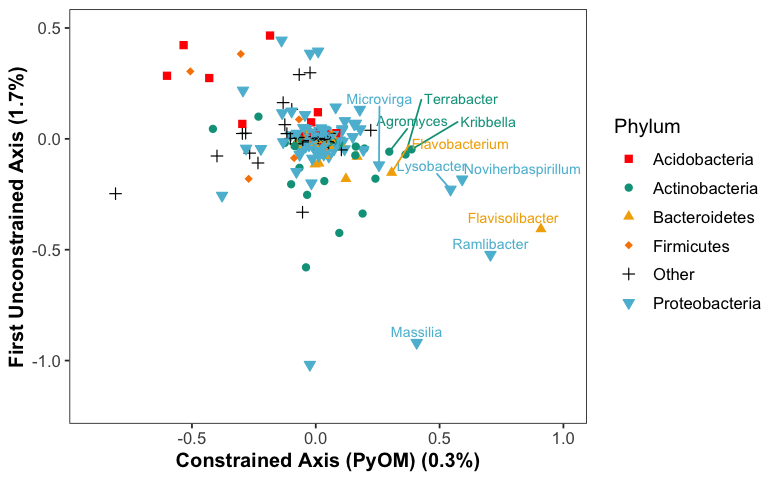

In [79]:
options(repr.plot.width=6.5, repr.plot.height=4)
p = ggplot(PlotDataTaxa,aes(x=CAP1,y=MDS1,color=PhylumColour,fill=PhylumColour,shape=PhylumColour))
p = p + geom_point(size=2) + geom_text_repel(aes(label=GenusLabel),size=3,show.legend = FALSE,vjust=1)
p = p + scale_colour_manual(values=c(wes_palette("Darjeeling1")[1:4],"black",wes_palette("Darjeeling1")[5]))
p = p + scale_fill_manual(values=c(wes_palette("Darjeeling1")[1:4],"black",wes_palette("Darjeeling1")[5]))
p = p + theme_bw() + theme(legend.position="right") +
  theme(
    plot.background = element_blank()
    ,panel.grid.major = element_blank()
    ,panel.grid.minor = element_blank()
    ,axis.title = element_text(size=12, face="bold"),
    axis.text = element_text(size=10),
    legend.text = element_text(size=10),
    legend.title = element_text(size = 12),
    strip.background = element_rect(colour="white", fill="white"))
p = p + scale_shape_manual(values=c(15:18,3,25))
p = p + guides(color=guide_legend(title="Phylum"),fill=guide_legend(title="Phylum"),shape=guide_legend(title="Phylum"))
p = p + xlab("Constrained Axis (PyOM) (0.3%)") + ylab("First Unconstrained Axis (1.7%)")
p = p + ylim(c(-1.2,0.5))  + xlim(c(-0.9,1))
p

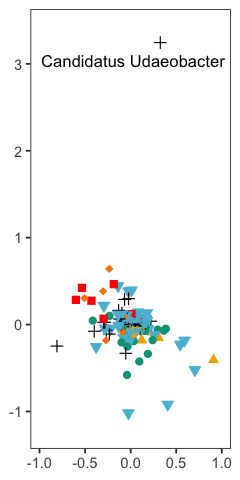

In [81]:
# Creating inset for figure
options(repr.plot.width=2, repr.plot.height=4)
p = ggplot(PlotDataTaxa,aes(x=CAP1,y=MDS1,color=PhylumColour,fill=PhylumColour,shape=PhylumColour))
p = p + geom_point(size=2) + geom_text_repel(aes(label=GenusLabel2),size=3.5,show.legend = FALSE,vjust=2)
p = p + scale_colour_manual(values=c(wes_palette("Darjeeling1")[1:4],"black",wes_palette("Darjeeling1")[5]))
p = p + scale_fill_manual(values=c(wes_palette("Darjeeling1")[1:4],"black",wes_palette("Darjeeling1")[5]))
p = p + theme_bw() + theme(legend.position="right") +
  theme(
    plot.background = element_blank()
    ,panel.grid.major = element_blank()
    ,panel.grid.minor = element_blank()
    ,axis.title = element_blank(),
    #axis.text = element_blank(),
    legend.text = element_blank(),
    legend.title = element_blank(),
    strip.background = element_rect(colour="white", fill="white"))
p = p + scale_shape_manual(values=c(15:18,3,25))
p = p + theme(legend.position="none")
p = p + xlab("Constrained Axis (PyOM) (0.3%)") + ylab("First Unconstrained Axis (1.7%)")
p = p + ylim(c(-1.2,3.4))  + xlim(c(-1,1))
p

In [35]:
#saveRDS(PlotDataTaxa,"PlotDataTaxa.df")